In [14]:
#Import Libraries
import nltk
import pandas as pd
import numpy as np

# Uncomment the following line the first time you run the code
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Joe
[nltk_data]     Fritch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Joe
[nltk_data]     Fritch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Load Dataset



In [3]:
#Check Shape
df.shape

(36679, 3)

In [4]:
#Create Column Names
df.columns = ['text','user_name','date']


In [5]:
#View Sample
df.sample(10)

,text,user_name,date
23631,NaN,21020humbleworkhorse,2018-09-04T23:41:56+00:00
35818,I wanna be on that adoption diet. Not mass ado...,FrankieSaints,2019-01-08T04:29:12+00:00
8979,"No man, you don't understand. CNBC is the coun...",Antranik,2018-11-20T08:05:07+00:00
4402,Some YouTuber's calculation,FrankieSaints,2018-09-07T03:23:40+00:00
34878,What a pleasant morning in Europe! I hope the ...,georgeb095,2018-11-06T05:42:30+00:00
26399,common core,whitenotwright,2018-10-13T12:45:49+00:00
8072,Can you summarise?,Karl_Cross,2018-09-29T19:47:06+00:00
31058,Just uninstalled the app I use to check prices...,cgrugger,2018-10-05T15:52:07+00:00
16390,"I retire in 8 months, so even if it goes up a ...",Snookie1980,2018-11-02T01:29:17+00:00
23324,"some people are buying, less people are selling",johansonnn,2019-01-14T16:05:44+00:00


In [6]:
#Check data types
#df.types

In [7]:
# Fill na with empty string
df = df.dropna()
#Check Shape
df.shape

(32380, 3)

In [8]:
#Check changes
df.sample(10)

,text,user_name,date
33364,"Assuming it does get put on, I feel like that’...",WhyAmIStillOnline,2018-01-03T23:00:20+00:00
35179,"Awesome teadrinker1983, you have tipped 0.5 XR...",xrptipbot,2018-11-06T11:22:03+00:00
21586,"Hope will not do anything, but if it keeps you...",Precedens,2018-11-28T13:17:58+00:00
10104,Nicely put mate. Mercury said the same. In the...,DoubleEko,2018-08-31T07:28:05+00:00
35856,The movie is basically made of memes...,Pastelkin,2019-01-08T18:39:34+00:00
28518,Lmao this thread is getting more crazy every d...,RMCOD,2018-11-03T02:36:49+00:00
34026,"Yep, value does not go up linearly with each p...",FrankieSaints,2018-10-23T14:16:23+00:00
14762,Balance /u/xrptipbot\r\nAnyone know the comman...,Toke_Hogan,2018-12-18T08:36:12+00:00
4646,Eferium sub is one of the most toxic ones in c...,CommanderMaster,2019-01-03T07:44:55+00:00
20059,The five minute chart is a bull flag now. That...,Bjerickson83,2018-11-05T18:35:00+00:00


In [9]:
import re

# Convert all the string to lower cases
df['text'] = df['text'].str.lower()
# \S+ means anything that is not an empty space
df['text'] = df['text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))
# We don't want empty string in our text
df = df.loc[df['text'] != ""]

In [10]:
#Check changes
df.sample(10)

,text,user_name,date
2425,what is the likelihood of xrp being $2 or more...,pacmans99,2018-09-27T04:03:38+00:00
2543,daily dinner recommendation: chicken cacciatore,Toke_Hogan,2018-10-07T04:52:31+00:00
21850,"so is eos. and no, i wouldn't think so.",Shodan_,2018-07-03T04:43:55+00:00
26632,xrparrot live can it be trusted? €500 max per ...,XRP-No1,2018-11-17T19:44:52+00:00
26576,sure looks like #2 spot is here to stay,ReYo112,2018-11-17T10:09:40+00:00
14999,i love it when xrp explodes like a grenade in ...,PaladinStacker,2018-09-18T12:44:29+00:00
7374,"this is genius, i can’t stop cracking up.",rmlayton,2018-11-21T08:44:12+00:00
18107,why is xrp still not on robinhood? i don't und...,Randyreddit11,2018-12-04T19:08:39+00:00
21235,that day will be a green day..,Goobi_dog,2018-09-01T05:41:44+00:00
15162,when triangle,bruhhzilla,2018-10-09T13:53:33+00:00


In [11]:
#Remove Punctuation
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [12]:
#Check changes
df.sample(10)

,text,user_name,date
15779,buys more xrp and mumbles under breath one day...,Big_Poli,2019-02-06T20:30:05+00:00
25240,this comment shouldnt have negative karma imo ...,fuuuuuckendoobs,2018-07-24T01:02:31+00:00
28837,because liquidity has to be there before utili...,masonntn,2018-12-01T01:49:54+00:00
5821,meteor crashing to earth launching next ice ag...,Shodan_,2018-07-24T21:22:02+00:00
17759,yep and being in australia the government chec...,biggunsg0b00m,2018-09-30T08:10:52+00:00
21772,as well as individually looking up the dozens...,mikenard77,2018-12-21T11:30:30+00:00
24175,sorry i should of clarified im using binance f...,PandazCakez,2018-04-20T20:14:54+00:00
7622,cheap prices nothing to buy with just my luck,renegadext88,2018-11-25T04:18:33+00:00
166,i use binance right now there are videos every...,ras29298,2018-05-25T13:15:45+00:00
2226,im a cloud engineer and spend a lot of time sp...,CrestedCracker,2018-09-26T20:19:52+00:00


In [13]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
#Check changes
df.sample(10)

,text,user_name,date
13436,lol takes 1 post get banned donald,_meowmix_5,2018-10-02T04:10:53+00:00
26491,tubes fine without listening gob shite mobile,XRP-No1,2018-11-17T11:46:57+00:00
30517,document contains errors main one probably xra...,j8jweb,2018-11-12T16:36:29+00:00
14101,never understand half people sub act like worl...,MO_14,2018-10-11T14:14:30+00:00
20857,green candles birthday told friends wanted xrp...,Oliver_Holes,2018-07-16T13:49:22+00:00
1540,youll fine take magnesium get rest blow like a...,jfgrissom,2018-12-07T15:06:00+00:00
5697,nothing special bitcon etf institutional inves...,Wombat151181,2018-08-16T15:55:32+00:00
14346,crypto world dow jones rating much,General-ColinBile,2018-12-03T23:21:42+00:00
13526,love see tail end us trading get ride asian ma...,natez303,2018-10-01T21:54:21+00:00
22473,ripple top5 mcap token majority twitter mentio...,Minoltah,2018-11-24T17:23:30+00:00


In [15]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
#wc.generate(' '.join(df['text']))

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

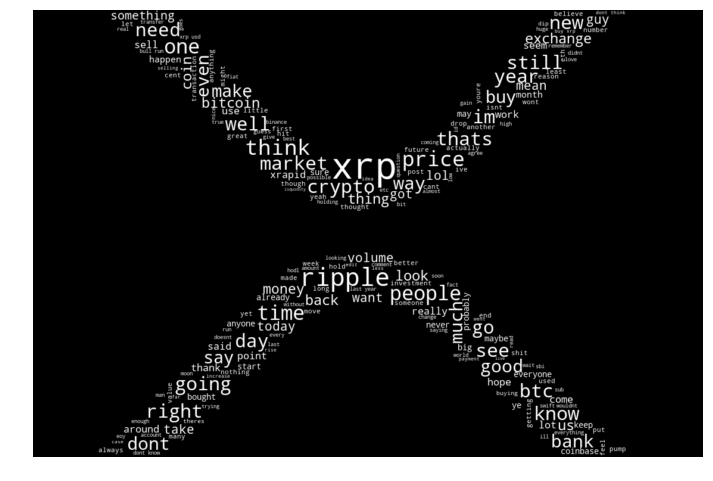

In [17]:
from PIL import Image
xrp_mask = np.array(Image.open("xrp_logo2.jpg"))


# Make the figure
wordcloud = WordCloud(mask=xrp_mask,background_color = 'black',color_func=lambda *args, **kwargs: "white").generate(' '.join(df['text']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [18]:
#Convert dates from strings to date objects
import datetime
#df['date'] = df['date'].map(lambda x: x.split('T', 1)[0])
#df['date'] = df['date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
#df['date'] = df['date'].map(lambda x: pd.to_datetime(x).date())
df = df.sort_values('date',ascending=True)
df.head()




NameError: name 'df' is not defined

In [68]:
df.to_csv('content_clean.csv',index=False)

In [15]:
df1 = pd.read_csv('content_clean_final.csv')
df2 = pd.read_csv('xrp_price_final.csv')


In [16]:
df2.sample(10)

,Date,Open,High,Low,Close,Volume,Market Cap
168,17-Aug-18,0.292808,0.373619,0.292766,0.366676,"497,206,000","14,436,913,947"
167,18-Aug-18,0.363027,0.369954,0.317115,0.327100,"434,332,000","12,878,711,866"
4,28-Jan-19,0.309360,0.309878,0.286563,0.294863,"584,796,818","12,137,576,987"
63,30-Nov-18,0.380538,0.381019,0.355205,0.362455,"512,041,152","14,616,841,112"
99,25-Oct-18,0.455780,0.462766,0.452681,0.458052,"273,380,000","18,416,216,084"
158,27-Aug-18,0.323643,0.337781,0.323066,0.336903,"227,284,000","13,347,493,496"
51,12-Dec-18,0.300671,0.311150,0.300671,0.307323,"370,325,300","12,577,803,841"
153,1-Sep-18,0.335313,0.352657,0.334467,0.347721,"257,267,000","13,787,190,893"
37,26-Dec-18,0.379991,0.391334,0.363441,0.378693,"690,588,635","15,448,432,552"
112,12-Oct-18,0.379313,0.439544,0.378914,0.419115,"820,154,000","16,763,608,540"


In [19]:
#Clean date of xrp price df2
import datetime
df1['date'] = df1['date'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))
df1['date'] = df1['date'].map(lambda x: pd.to_datetime(x).date())
df2['Date'] = df2['Date'].map(lambda x: datetime.datetime.strptime(x, '%d-%b-%y'))
df2['Date'] = df2['Date'].map(lambda x: pd.to_datetime(x).date())



In [50]:
#Test date math
#(df2['date'][0]-df2['date'][2]).days

2

In [20]:
#chane df2 column name to match df column name date
df2.rename(columns={'Date': 'date','Open':'open','Close':'close'}, inplace=True)
df2.head()


,date,open,High,Low,close,Volume,Market Cap
0,2019-02-01,0.310839,0.311895,0.299399,0.308517,"564,486,615","12,699,646,520"
1,2019-01-31,0.320704,0.333835,0.305866,0.310036,"780,304,474","12,762,148,539"
2,2019-01-30,0.289425,0.324064,0.287915,0.320461,"753,787,392","13,191,291,588"
3,2019-01-29,0.295060,0.296216,0.285888,0.289558,"454,631,055","11,919,217,295"
4,2019-01-28,0.309360,0.309878,0.286563,0.294863,"584,796,818","12,137,576,987"


In [24]:
#Merge Data Frames & Modify
df3 = pd.merge(df1, df2, on ='date')
#Remove columns
#df3 = df3.drop(['Volume', 'Market Cap','High','Low'], axis=1)
#Sorty by date
df3 = df3.sort_values('date',ascending=True)
#Create Daily Price Change Column
df3['daily_price_change'] = df3.apply(lambda x: x.close - x.open, axis=1)
#Create weekly index column
df3['week'] = df3.apply(lambda x: int(np.floor((x['date']-df3['date'][0]).days/7)), axis=1)
#Check mutations
df3.head()
#Group by week & grab info for new dataframe
start_date_series = df3.groupby('week').min()['date']
end_date_series = df3.groupby('week').max()['date']
start_date_mask = df3['date'].apply(lambda x:x in list(start_date_series))
end_date_mask = df3['date'].apply(lambda x:x in list(end_date_series))
start_open = df3.loc[start_date_mask,'open']
end_close = df3.loc[end_date_mask,'close']

number_of_posts = df3.groupby('week').text.count()
start_open = start_open.unique()
end_close = end_close.unique()
weekly_price_change = end_close - start_open
weekly_percent_change = (weekly_price_change/start_open)*100
week = list(range(27))
data = {'week': week, 'number_of_posts':number_of_posts,'week_open': start_open, 'week_close': end_close, 
        'weekly_price_change':weekly_price_change, 'weekly_percent_change':weekly_percent_change}
df4 = pd.DataFrame(data)
df3

,text,user_name,date,open,High,Low,close,Volume,Market Cap,daily_price_change,week
0,lost 12000 reality,BreadCuntGarlicMouse,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
66,sure downvotedbut go,etchasketch4u,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
65,100k month would take 10 months,frankrh23,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
64,im sell eos gets 12 thought would go 30 dont l...,meanathradon,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
63,need volume comes eos killing volume make sense,Timetraveller2015,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
62,never got exactly catalyst last two runs dont ...,etchasketch4u,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
61,yes sir aware scenario share positive sentimen...,funcrypto,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
60,thank mlordmladymgenderneutralhighlyrankedciti...,MeltedJaguar,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
59,24 hours litterally noise,Tyrexas,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0
58,eos kinda sketchit artificially pumped back la...,alexmma777,2018-07-30,0.453469,0.454549,0.436964,0.446107,"247,714,000","17,539,001,608",-0.007362,0


In [22]:
df3.to_csv('df3.csv',index=False)
df4.to_csv('df4.csv',index=False)



In [23]:
df4.sample(10)

,week,number_of_posts,week_open,week_close,weekly_price_change,weekly_percent_change
week,,,,,,
21,21,607,0.372398,0.369581,-0.002817,-0.756449
26,26,625,0.309360,0.308517,-0.000843,-0.272498
1,1,873,0.433886,0.297870,-0.136016,-31.348327
24,24,610,0.318354,0.321177,0.002823,0.886749
12,12,600,0.456089,0.462406,0.006317,1.385037
9,9,1561,0.583511,0.482039,-0.101472,-17.389904
17,17,1084,0.375553,0.367627,-0.007926,-2.110488
2,2,997,0.297572,0.343978,0.046406,15.594881
20,20,939,0.288101,0.371270,0.083169,28.868001


In [9]:
stop.append('know')
stop.append('thats')


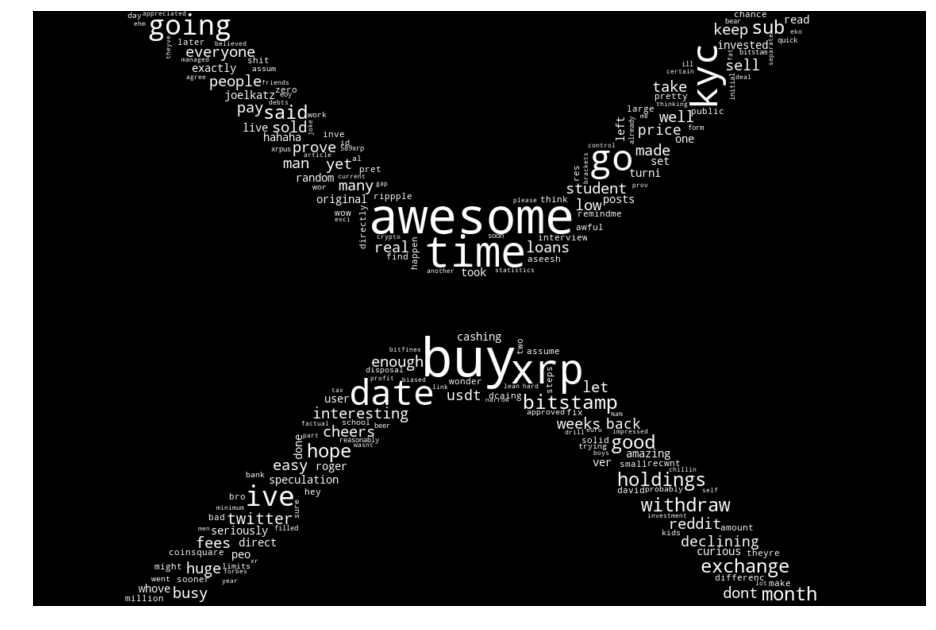

In [17]:

#Word cloud of words used a day prior to a daily gain
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
xrp_mask = np.array(Image.open("xrp_logo2.jpg"))

df42 = pd.read_csv('df42.csv')
df42['text'] = str(df42['text'])

#Remove additional stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('know')
stop.append('thats')
stop.append('yeah')
stop.append('im')
df42['text'] = df42['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Make the figure
wordcloud = WordCloud(mask=xrp_mask,
                      background_color = 'black',
                      max_words = 200,
                      collocations=False,
                      color_func=lambda *args, **kwargs: "white").generate(' '.join(df42['text']))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


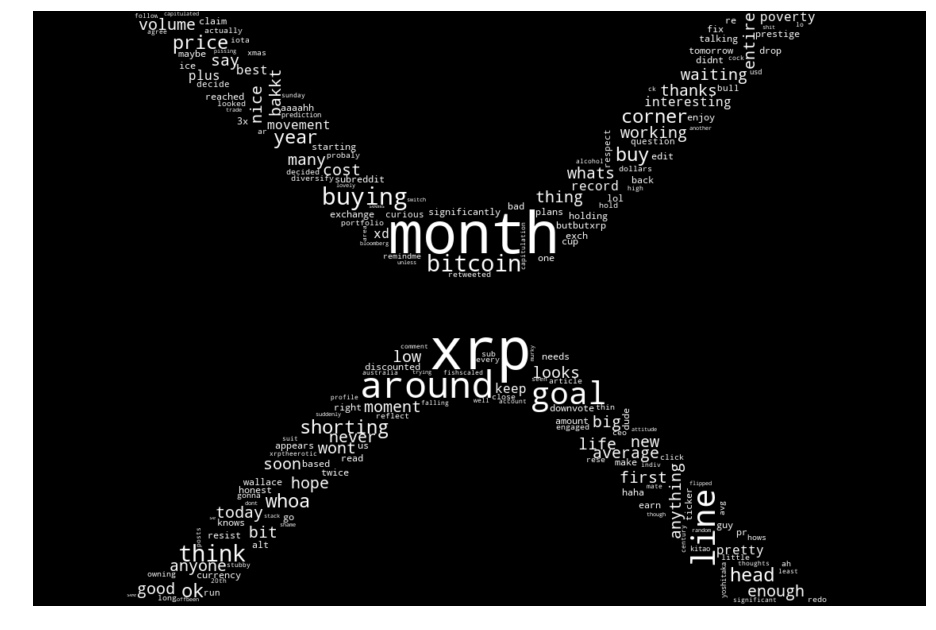

In [18]:

#Word cloud of words used a week prior to a weekly gain
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
xrp_mask = np.array(Image.open("xrp_logo2.jpg"))

df45 = pd.read_csv('df45.csv')
df45['text'] = str(df45['text'])


df45['text'] = df45['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Make the figure
wordcloud = WordCloud(mask=xrp_mask,
                      background_color = 'black',
                      max_words = 200,
                      collocations=False,
                      color_func=lambda *args, **kwargs: "white").generate(' '.join(df45['text']))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


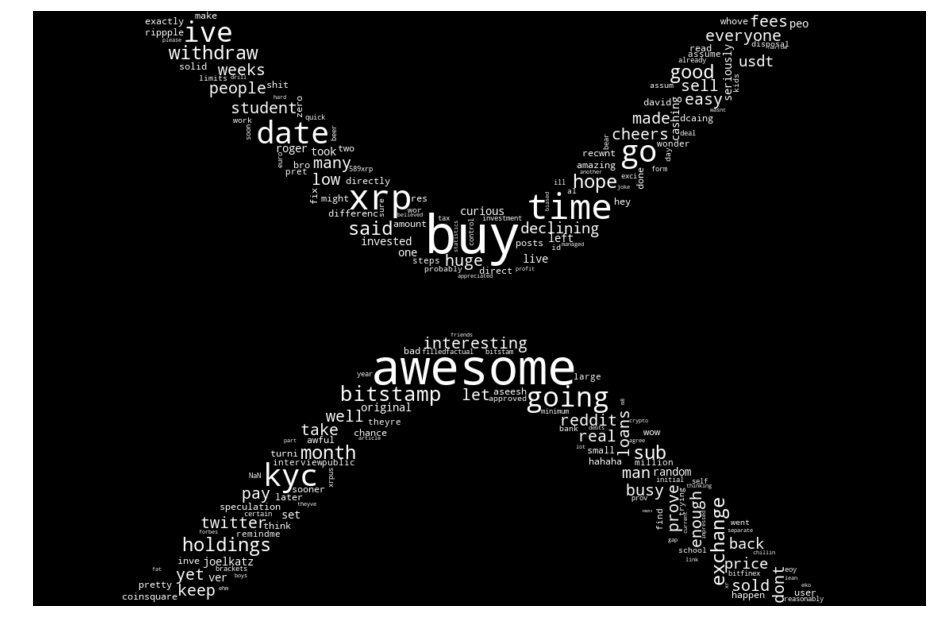

In [19]:

#Word cloud of words used a day prior to a daily loss
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
xrp_mask = np.array(Image.open("xrp_logo2.jpg"))

df48 = pd.read_csv('df48.csv')
df48['text'] = str(df48['text'])
df48['text'] = df48['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Make the figure
wordcloud = WordCloud(mask=xrp_mask,
                      background_color = 'black',
                      max_words = 200,
                      collocations=False,
                      color_func=lambda *args, **kwargs: "white").generate(' '.join(df48['text']))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


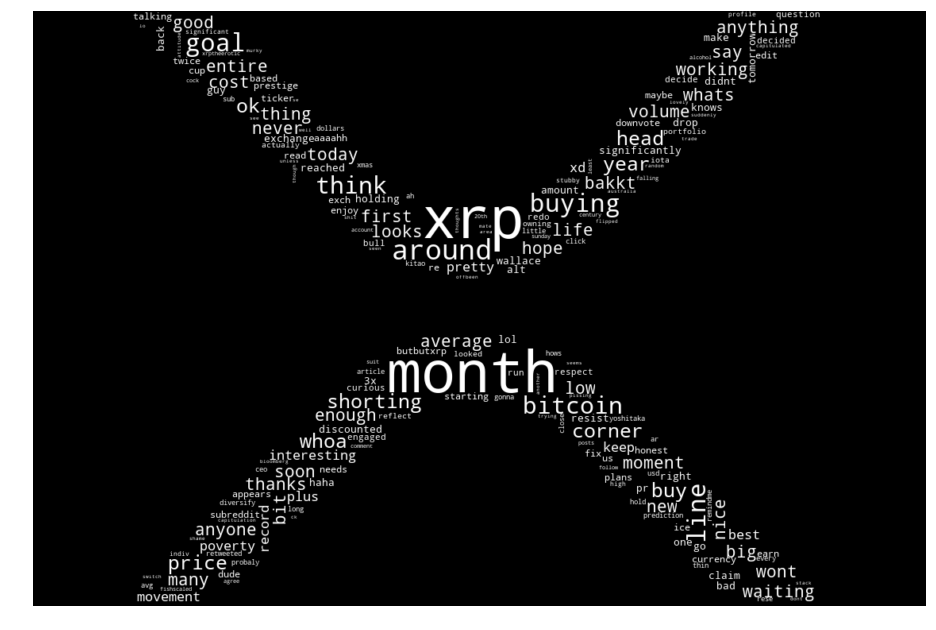

In [20]:

#Word cloud of words used a week prior to a weekly loss
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
xrp_mask = np.array(Image.open("xrp_logo2.jpg"))

df51 = pd.read_csv('df51.csv')
df51['text'] = str(df51['text'])

df51['text'] = df51['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Make the figure
wordcloud = WordCloud(mask=xrp_mask,
                      background_color = 'black',
                      max_words = 200,
                      collocations=False,
                      color_func=lambda *args, **kwargs: "white").generate(' '.join(df51['text']))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [63]:
#Sentiment Analysis on all text data
from textblob import TextBlob
df3 = pd.read_csv('df3.csv')
def sentiment_func(x):
    sentiment = TextBlob(str(x['text']))
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

#sample = df3.sample(sample_size).apply(sentiment_func, axis=1)
sample = df3.apply(sentiment_func, axis=1)
sample.shape



(24972, 13)

In [65]:
#Write to CSV, Plot in R
sample.to_csv('df3_wsentiment.csv',index=False)